# Classificação MNIST

Importando algumas bibliotecas **necessárias**

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregando o Dataset

In [15]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [16]:
train_images = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo

In [17]:
model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3
750/750 [==============================] - 49s 65ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0396 - val_accuracy: 0.9884
Epoch 2/3
750/750 [==============================] - 45s 60ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0454 - val_accuracy: 0.9872
Epoch 3/3
750/750 [==============================] - 45s 60ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0437 - val_accuracy: 0.9881


# Avaliando o modelo

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.0367 - accuracy: 0.9883


# Avaliando com uma imagem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
index = np.random.randint(0, len(test_images))

image = test_images[index]
label = test_labels[index]

In [23]:
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)

predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 22ms/step


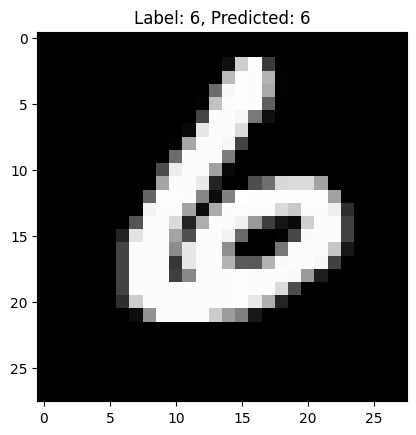

In [24]:
plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
plt.title(f'Label: {np.argmax(label)}, Predicted: {predicted_class}')
plt.show()